<a href="https://colab.research.google.com/github/viboo27/ML/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
#importing library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [26]:
class Linear_Regression():
# initiating the parameter (learning_rate and no_of_itertions)
  def __init__(self, learning_rate, no_of_iterations):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations
    self.dw=np.array([0],dtype=np.float64)
    self.db=np.array([0],dtype=np.float64)

  def fit(self, X, Y):
    # no of training examples & numbers of features

    self.m,self.n = X.shape   # no of rows and columns

    # initiating the weight and bias
    
    print(self.m)
    print(self.n)
    self.w = np.zeros(self.n,dtype=np.float64)
    self.b = np.array([0],dtype=np.float64)
    self.X =np.array(X,dtype=np.float64)
    self.Y = np.array(Y,dtype=np.float64)

    # implementing gradient descent

    for i in range(self.no_of_iterations):
      self.update_weight()

  def update_weight( self ):
    Y_prediction = self.predict(self.X)

    # calculate gradient
    
    self.dw = - ( 2 * (self.X.T).dot(self.Y - Y_prediction) )/self.m
    self.db = -2 * np.sum(self.Y - Y_prediction)/self.m

    # updating the weights

    self.w = self.w - self.learning_rate*self.dw
    self.b = self.b - self.learning_rate*self.db

  def predict(self,X):

    return X.dot(self.w) + self.b

In [27]:
#prepare dataset funtcion

def prepare_dataset(gdp_per_capita,oecd_bli):
  oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
  oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
  gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
  gdp_per_capita.set_index("Country", inplace=True)
  full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,left_index=True, right_index=True)
  full_country_stats.sort_values(by="GDP per capita", inplace=True)
  remove_indices = [0, 1, 6, 8, 33, 34, 35]
  keep_indices = list(set(range(36)) - set(remove_indices))
  full_country_stats = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
  
  return full_country_stats

In [28]:
#importing dataset

gdp_per_capita = pd.read_csv('/gdp_per_capita.csv',encoding='latin-1')
oecd_bli = pd.read_csv('/oecd_bli_2015.csv',encoding = 'latin-1')


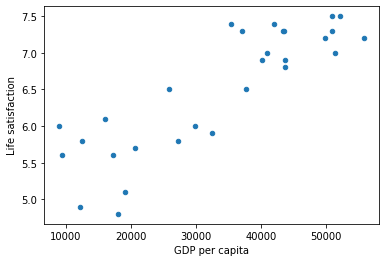

In [29]:
#preparing dataset
full_country_stats = prepare_dataset(gdp_per_capita,oecd_bli)
X = np.c_[full_country_stats["GDP per capita"]]
Y =  np.c_[full_country_stats["Life satisfaction"]]
X = np.array(X, dtype=np.float64)
Y = np.array(Y, dtype=np.float64)
#print(X)
full_country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

#print(X)
#print(Y)


In [30]:
#training the model

reg = LinearRegression().fit(X, Y)
#model = Linear_Regression(learning_rate=0.02,no_of_iterations=1000)
reg.fit(X,Y)
X_new = [[21342]]
print(reg.predict(X_new))

[[5.90127465]]


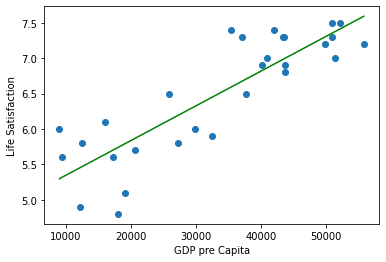

In [31]:
plt.plot(X,reg.predict(X),color='green')
plt.scatter(X,Y)
plt.xlabel("GDP pre Capita")
plt.ylabel("Life Satisfaction")
plt.show()